
# Сборный проект-2 #

## Исследование пользователей мобильного приложения стартапа в сфере продажи продуктов питания ##

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

## Описание данных ## 

Каждая запись в логе — это действие пользователя, или событие.

- EventName — название события;
- DeviceIDHash — уникальный идентификатор пользователя;
- EventTimestamp — время события;
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

### План и задачи проекта: ###

1. Загрузить файл и изучить общую информацию.
2. Заменить название столбцов.
3. Проверить пропуски и типы данных.
4. Добавить столбец даты и времени, а также отдельный столбец дат.
5. Найти количество общее событий в логе.
6. Найти количество общее пользователей в логе.
7. Найти среднее количество событий на пользователя.
8. Найти максимальную и минимальную дату. Построить гистограмму по дате и времени. 
9. Определить, с какого момента данные полные и отбросить более старые.

Изучить воронку событий:

10. Посмотреть, какие события есть в логах, как часто они встречаются. Отсортировать события по частоте.
11. Посчитать, сколько пользователей совершали каждое из этих событий. Отсортировать события по числу пользователей. Посчитать долю пользователей, которые хоть раз совершали событие.
12. Выдвинуть предположение, в каком порядке происходят события.
13. Посчитать по воронке событий, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). 
14. Изучить, на каком шаге теряется больше всего пользователей.
15. Изучить, какая доля пользователей доходит от первого события до оплаты?

Изучите результаты эксперимента:

16. Найти, сколько пользователей в каждой экспериментальной группе?
17. Проверить корректность всех механизмов и расчётов А/А теста. Проверить, находят ли статистические критерии разницу между выборками 246 и 247.
18. Выбрать самое популярное событие. Посчитать число пользователей, совершивших это событие в каждой из контрольных групп. Посчитать долю пользователей, совершивших это событие. Проверить, будет ли отличие между группами статистически достоверным. 
19. Проделать то же самое для всех других событий. 
20. Проделать те же действия с группой с изменённым шрифтом. Сравнить результаты с каждой из контрольных групп в отдельности по каждому событию. Сравнить результаты с объединённой контрольной группой. Сделать выводы из эксперимента.
21. Посчитать, сколько проверок статистических гипотез сделано. Указать, какой уровень значимости стоит применить.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import math as mth
import numpy as np
import datetime as dt
from plotly import graph_objects as go

In [2]:
df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [3]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
df.describe()

,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


In [6]:
print(df.duplicated().sum())

413


<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 👍
</div>

В нашем датасете 413 дубликатов. Будем считать, что это ошибки и удалим эти значения.
Пропусков нет.


In [7]:
df = df.drop_duplicates().reset_index(drop=True)
print(df.duplicated().sum())

0


Переименуем столбцы для дальнейшей работы.

In [8]:
df.columns.tolist()

['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId']

In [9]:
df.columns = ['event_name', 'user_id', 'event_timestamp', 'exp_id']

In [10]:
df.head()

,event_name,user_id,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Добавим столбец с датой и временем (вытащим из event_timestamp) и отдельный столбец с датой

In [11]:
df['date_time'] = pd.to_datetime(df['event_timestamp'], unit='s')
df['date'] = df['date_time'].astype('datetime64[D]')
df.head()

,event_name,user_id,event_timestamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
event_name         243713 non-null object
user_id            243713 non-null int64
event_timestamp    243713 non-null int64
exp_id             243713 non-null int64
date_time          243713 non-null datetime64[ns]
date               243713 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


Проверим, сколько в логе всего событий, пользователей и вычислим среднее количество событий на пользователя.

In [13]:
df['event_name'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

Уникальных видов событий 5, теперь узнаем сколько всего событий было в логе (можно посмотреть и по df.info()).

In [14]:
print('Всего событий в логе:', len(df['event_name']))

Всего событий в логе: 243713


In [15]:
print('Всего пользователей в логе:', (df['user_id'].nunique()))

Всего пользователей в логе: 7551


In [16]:
print('В среднем событий на пользователя: {:.0f}'.format((len(df['event_name']) / df['user_id'].nunique())))

В среднем событий на пользователя: 32


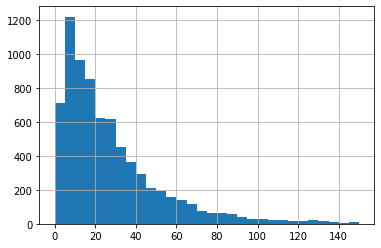

In [17]:
df.groupby('user_id')['event_name'].agg('count').hist(bins=30,range=(0,150))

In [18]:
median_events_per_user = int(df.groupby('user_id')['event_name'].agg('count').median())
median_events_per_user

20

<div class="alert alert-info"> <b>
</b> 
Распределение далеко от нормального. Здесь уместно использовать медианное значение - 20 событий на пользователя.
    
</div>


Найдем максимальную и минимальную дату, построим распределение по дате и времени.

In [19]:
print('Максимальная дата:', df['date_time'].max())
print('Минимальная дата:', df['date_time'].min())

Максимальная дата: 2019-08-07 21:15:17
Минимальная дата: 2019-07-25 04:43:36


В нашем датасете данные с 25 июля по 7 августа 2019 года.

In [20]:
df_date_grouped = df.groupby('date').agg({'event_name':'count'})
df_date_grouped

,event_name
date,
2019-07-25,9
2019-07-26,31
2019-07-27,55
2019-07-28,105
2019-07-29,184
2019-07-30,412
2019-07-31,2030
2019-08-01,36141
2019-08-02,35554


In [21]:
#Сразу сделаю функцию для будущих графиков barplot
def barplot(data, title, x_label, y_label):
    data.plot.bar()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)
    plt.grid(True);

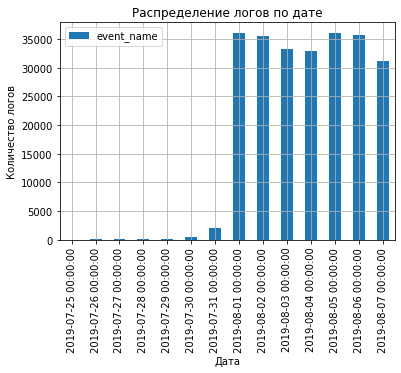

In [22]:
barplot(df_date_grouped,'Распределение логов по дате', 'Дата', 'Количество логов')

Скорее всего, полные данные начинаются только с 1 августа. 

Оставляем только полные данные.

In [23]:
df = df[df['date_time']>='2019-08-01 00:00']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240887 entries, 2826 to 243712
Data columns (total 6 columns):
event_name         240887 non-null object
user_id            240887 non-null int64
event_timestamp    240887 non-null int64
exp_id             240887 non-null int64
date_time          240887 non-null datetime64[ns]
date               240887 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 12.9+ MB


In [24]:
print('Всего пользователей в логе:', (df['user_id'].nunique()))

Всего пользователей в логе: 7534


Было 243713 логов, после чистки 240887 логов. Удалили 2826 значений.
Было - 7551 уникальных пользователей, стало 7534 пользователя. Удалили 17 пользователей.

Проверим, наличие всех 3 экспериментальных групп в новом датасете.

In [25]:
df_exp_grouped = df.groupby('exp_id').agg({'user_id':'nunique'})
df_exp_grouped

,user_id
exp_id,
246,2484
247,2513
248,2537


Пользователи всех групп присутствуют в новом датасете почти в равной пропорции.

Теперь посмотрим, какие события есть в логах и частоту их встречаемости.

In [26]:
df_event_name_grouped = df.groupby('event_name').agg({'user_id':'count'}).sort_values(by='user_id', ascending=False).reset_index()
df_event_name_grouped

,event_name,user_id
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


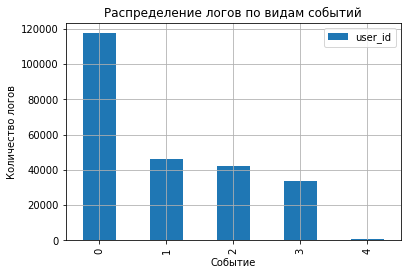

In [27]:
barplot(df_event_name_grouped, 'Распределение логов по видам событий', 'Событие', 'Количество логов')

Text(0.5, 1.0, 'Распределение логов по видам событий')

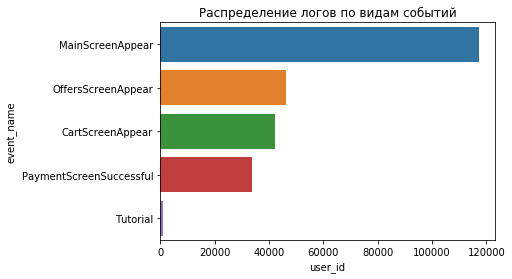

In [28]:
ax = sns.barplot(y='event_name', x='user_id', data=df_event_name_grouped)
ax.set_title('Распределение логов по видам событий')

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b> Да, то что нужно!
</div>

Посчитаем, сколько пользователей совершали каждое из этих событий. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [29]:
df_event_name_grouped_uniq_users = df.groupby('event_name').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
df_event_name_grouped_uniq_users

,user_id
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


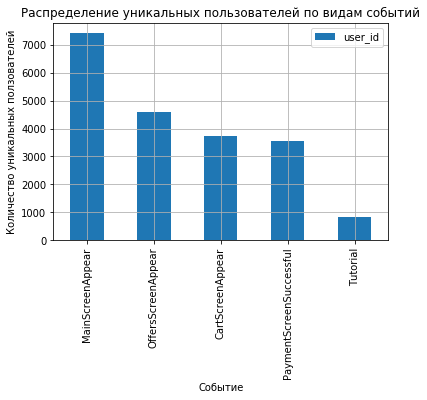

In [30]:
barplot(df_event_name_grouped_uniq_users, 'Распределение уникальных пользователей по видам событий', 'Событие', 'Количество уникальных ползователей')

In [31]:
total_users = df['user_id'].nunique()
total_users

7534

In [32]:
df_event_name_grouped_uniq_users['share_of_total'] = round(df_event_name_grouped_uniq_users['user_id'] / total_users, 3)
df_event_name_grouped_uniq_users


,user_id,share_of_total
event_name,,
MainScreenAppear,7419,0.985
OffersScreenAppear,4593,0.610
CartScreenAppear,3734,0.496
PaymentScreenSuccessful,3539,0.470
Tutorial,840,0.111


In [33]:
output = df_event_name_grouped_uniq_users.to_string(formatters={'share_of_total': '{:,.2%}'.format})
print(output)

                         user_id share_of_total
event_name                                     
MainScreenAppear            7419         98.50%
OffersScreenAppear          4593         61.00%
CartScreenAppear            3734         49.60%
PaymentScreenSuccessful     3539         47.00%
Tutorial                     840         11.10%


<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b> 👍
</div>

До последнего этапа (Tutorial) дошли только 11% пользователей (хотя нет 100% уверенности, что обучение - это следующий этап в воронке). Также немного странно, что первое действие совершили не 100%. Скорее всего данные об их первом действии (MainScreenAppear) попали в ту часть, которую мы отсекли (до 31 июля).

Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

Скорее всего, воронка выглядит следующим образом:
1. Пользователь заходит на главную страницу (MainScreenAppear).
2. Далее заходит на экран предложений (OffersScreenAppear).
3. Далее заходит на страницу оплаты (CartScreenAppear).	
4. Далее совершает успешную покупку (PaymentScreenSuccessful)
*5. Далее следует обучение (но обучение, возможно, уже не входит в воронку. Скорее всего, целевое действие заканчивается на покупке, а обучение - это уже личное дело каждого покупателя. Поэтому пока что будем считать, что воронка заканчивается на 4 шаге.)

<div class="alert alert-success">
<b>Комментарий ревьюера: </b> Обучение чему? :) Верно, Туториал можно исключить.
</div>

Теперь посмотрим, какая доля пользователей проходит на каждый последующий шаг воронки. Строим сводную таблицу, где будут указаны минимальное время прохождения каждого шага. (если пользователь не перешел на следующий шаг воронки, то в таблице будет пропуск)

In [34]:
df.head()

,event_name,user_id,event_timestamp,exp_id,date_time,date
2826,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2827,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2828,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2829,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2830,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01


In [35]:
df_exp_grouped = df.groupby('exp_id').agg({'user_id':'nunique'})
df_exp_grouped

,user_id
exp_id,
246,2484
247,2513
248,2537


In [36]:
users = df.pivot_table(
        index='user_id', 
        columns='event_name', 
        values='date_time',
        aggfunc='min').reset_index() 

users.head(10)

event_name,user_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
0,6888746892508752,NaT,2019-08-06 14:06:34,NaT,NaT,NaT
1,6909561520679493,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58,NaT
2,6922444491712477,2019-08-04 14:19:40,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40,NaT
3,7435777799948366,NaT,2019-08-05 08:06:34,NaT,NaT,NaT
4,7702139951469979,2019-08-02 14:28:45,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45,NaT
5,8486814028069281,2019-08-05 04:49:18,2019-08-05 04:52:40,2019-08-05 04:49:13,NaT,NaT
6,8740973466195562,NaT,2019-08-02 09:16:48,2019-08-02 09:43:59,NaT,NaT
7,9841258664663090,2019-08-03 10:52:15,2019-08-03 10:47:59,2019-08-03 10:49:42,2019-08-03 17:57:27,2019-08-03 10:47:28
8,12692216027168046,NaT,2019-08-02 16:28:49,2019-08-05 04:06:02,NaT,NaT
9,15708180189885246,2019-08-01 11:06:19,2019-08-01 16:08:23,2019-08-01 05:38:55,2019-08-01 11:06:19,NaT


Поменял местами события, чтобы они были в порядке воронки.

In [37]:
users = users[['user_id', 'MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']]
users.head(10)

event_name,user_id,MainScreenAppear,OffersScreenAppear,CartScreenAppear,PaymentScreenSuccessful,Tutorial
0,6888746892508752,2019-08-06 14:06:34,NaT,NaT,NaT,NaT
1,6909561520679493,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58,2019-08-06 18:52:58,NaT
2,6922444491712477,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40,2019-08-04 14:19:40,NaT
3,7435777799948366,2019-08-05 08:06:34,NaT,NaT,NaT,NaT
4,7702139951469979,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45,2019-08-02 14:28:45,NaT
5,8486814028069281,2019-08-05 04:52:40,2019-08-05 04:49:13,2019-08-05 04:49:18,NaT,NaT
6,8740973466195562,2019-08-02 09:16:48,2019-08-02 09:43:59,NaT,NaT,NaT
7,9841258664663090,2019-08-03 10:47:59,2019-08-03 10:49:42,2019-08-03 10:52:15,2019-08-03 17:57:27,2019-08-03 10:47:28
8,12692216027168046,2019-08-02 16:28:49,2019-08-05 04:06:02,NaT,NaT,NaT
9,15708180189885246,2019-08-01 16:08:23,2019-08-01 05:38:55,2019-08-01 11:06:19,2019-08-01 11:06:19,NaT


Теперь смотрим, сколько пользователей последовательно прошли по всей воронке событий и долю пользователей, которые проходят на каждый последующий шаг относительно предыдущего.

In [38]:
step_1 = ~users['MainScreenAppear'].isna()
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])

n_mainscreen = users[step_1].shape[0]
n_offerscreen = users[step_2].shape[0]
n_cartscreen = users[step_3].shape[0]
n_payment = users[step_4].shape[0]

print('Посетителей главной страницы:', n_mainscreen)
print('Зашли на страницу предложений:', n_offerscreen)
print('Начали оформлять заказ:', n_cartscreen)
print('Успешно оплатили:', n_payment)


Посетителей главной страницы: 7419
Зашли на страницу предложений: 4201
Начали оформлять заказ: 1767
Успешно оплатили: 454


In [39]:
event_user_uniq = df.groupby('event_name').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
event_user_uniq

,user_id
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


<div class="alert alert-info"> <b>
</b> 
Да, в выводе я писал, что могут быть пользователи, которые проходили не через все этапы воронки. Просто думал, что здесь надо  сначала найти число пользователей на каждом шаге воронки, а потом пользователей, которые последовательно прошли через каждый этап воронки.
    
</div>


In [40]:
print('Доля посетителей, зашедших с главной страницы на страницу предложений:', round((n_offerscreen / n_mainscreen),3 ))
print('Доля посетителей, перешедших со страницы предложений на страницу оплаты:', round((n_cartscreen / n_offerscreen),3 ))
print('Доля посетителей, начавших оплату и успешно ее завершивших:', round((n_payment / n_cartscreen),3 ))
print('Доля посетителей, прошедших от начала воронки до конца:', round((n_payment / n_mainscreen),3 ))

Доля посетителей, зашедших с главной страницы на страницу предложений: 0.566
Доля посетителей, перешедших со страницы предложений на страницу оплаты: 0.421
Доля посетителей, начавших оплату и успешно ее завершивших: 0.257
Доля посетителей, прошедших от начала воронки до конца: 0.061


Как видим, большая часть пользователей отваливается на шаге от начала оформления заказа до успешной оплаты. Возможно, в приложении есть проблемы с оплатой. Например, не видно какой-либо кнопки, не поддерживает определенные платежные системы или еще какие-либо технические сбои, которые приводят к тому, что пользователь, который уже выбрал товар, в итоге на стадии оформления отказывается совершать покупку. 

Всего от начала до конца воронки доходит только 6,1% пользователей (с учетом последовательного прохождения всех шагов). Не все пользователи последовательно проходят по нашей воронке. Возможно, они ранее откладывали себе в корзину товары или, например, могли искать и оформлять товар не через наше приложение, а через маркетплейс, который автоматически передает данные в наше приложение уже о самой покупке, не проходя через все шаги воронки.

Найдем, сколько пользователей в каждой экспериментальной группе и самое популярное событие. Определим долю пользователей, совершивших это событие.

In [41]:
df_exp_grouped = df_exp_grouped.rename(columns={'user_id': 'total_users_in_group'})
df_exp_grouped

,total_users_in_group
exp_id,
246,2484
247,2513
248,2537


In [42]:
df.head()

,event_name,user_id,event_timestamp,exp_id,date_time,date
2826,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2827,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2828,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2829,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2830,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01


In [43]:
exp_id_events_count = df.groupby(['exp_id', 'event_name']).agg({'user_id':'nunique'}).reset_index()
exp_id_events_count

,exp_id,event_name,user_id
0,246,CartScreenAppear,1266
1,246,MainScreenAppear,2450
2,246,OffersScreenAppear,1542
3,246,PaymentScreenSuccessful,1200
4,246,Tutorial,278
5,247,CartScreenAppear,1238
6,247,MainScreenAppear,2476
7,247,OffersScreenAppear,1520
8,247,PaymentScreenSuccessful,1158
9,247,Tutorial,283


In [44]:
exp_merged = exp_id_events_count.merge(df_exp_grouped, left_on='exp_id', right_on='exp_id', how = 'left').sort_values(by=['exp_id','user_id'],ascending=False)
exp_merged

,exp_id,event_name,user_id,total_users_in_group
11,248,MainScreenAppear,2493,2537
12,248,OffersScreenAppear,1531,2537
10,248,CartScreenAppear,1230,2537
13,248,PaymentScreenSuccessful,1181,2537
14,248,Tutorial,279,2537
6,247,MainScreenAppear,2476,2513
7,247,OffersScreenAppear,1520,2513
5,247,CartScreenAppear,1238,2513
8,247,PaymentScreenSuccessful,1158,2513
9,247,Tutorial,283,2513


Во всех случаях самое популярное событие - первый шаг воронки, т.е. заход на главную страницу.

In [45]:
exp_merged['share_of_total'] = round(exp_merged['user_id'] / exp_merged['total_users_in_group'], 3)
exp_merged

,exp_id,event_name,user_id,total_users_in_group,share_of_total
11,248,MainScreenAppear,2493,2537,0.983
12,248,OffersScreenAppear,1531,2537,0.603
10,248,CartScreenAppear,1230,2537,0.485
13,248,PaymentScreenSuccessful,1181,2537,0.466
14,248,Tutorial,279,2537,0.110
6,247,MainScreenAppear,2476,2513,0.985
7,247,OffersScreenAppear,1520,2513,0.605
5,247,CartScreenAppear,1238,2513,0.493
8,247,PaymentScreenSuccessful,1158,2513,0.461
9,247,Tutorial,283,2513,0.113


In [46]:
exp_mainscreen_query = exp_merged.query('event_name == "MainScreenAppear"')
exp_mainscreen_query

,exp_id,event_name,user_id,total_users_in_group,share_of_total
11,248,MainScreenAppear,2493,2537,0.983
6,247,MainScreenAppear,2476,2513,0.985
1,246,MainScreenAppear,2450,2484,0.986


Почти все пользователи в каждой группе начинают с главной страницы. Доли остальных событий отличаются не так сильно. Чтобы понять, есть ли различия между группами, проведем тесты для выявления статистической значимости.

Уберем "обучение", т.к. условились, что оно не является шагом в нашей воронке.

In [47]:
exp_246 = df[(df['exp_id'] == 246) & (df['event_name'] != 'Tutorial')]
exp_247 = df[(df['exp_id'] == 247) & (df['event_name'] != 'Tutorial')]
exp_248 = df[(df['exp_id'] == 248) & (df['event_name'] != 'Tutorial')]

In [48]:
funnel_246 = exp_246.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index().rename(columns={'user_id': 'total_users'})
funnel_247 = exp_247.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index().rename(columns={'user_id': 'total_users'})
funnel_248 = exp_248.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index().rename(columns={'user_id': 'total_users'})

In [49]:
funnel_246

,event_name,total_users
0,MainScreenAppear,2450
1,OffersScreenAppear,1542
2,CartScreenAppear,1266
3,PaymentScreenSuccessful,1200


In [50]:
funnel_247

,event_name,total_users
0,MainScreenAppear,2476
1,OffersScreenAppear,1520
2,CartScreenAppear,1238
3,PaymentScreenSuccessful,1158


Посмотрим, как отличается общее число пользователей в двух контрольных группах и количество пользователей, проходящих через каждый шаг воронки.

In [51]:
df_exp_grouped

,total_users_in_group
exp_id,
246,2484
247,2513
248,2537


In [52]:
df_exp_grouped['total_users_in_group'][247] / df_exp_grouped['total_users_in_group'][246]

1.0116747181964574

In [53]:
funnel_247['total_users'] / funnel_246['total_users'] * 100

0    101.061224
1     98.573281
2     97.788310
3     96.500000
Name: total_users, dtype: float64

Проверим, есть ли пользователи, которые присутствуют больше, чем в 1 группе.

In [54]:
df.groupby('user_id')['exp_id'].nunique().reset_index().query('exp_id > 1')

,user_id,exp_id


<div class="alert alert-info"> <b>
</b> 
Как я понял, здесь мы формируем не различия или равенство в конверсиях, а наличие или отсутствие значимой разницы между долями этой конверсии.
    

Проверим гипотезы:
1. H0: Между долями конверсии нет значимой разницы.
2. H1: Между долями конверсии есть значимая разница.

Уровень значимости берем альфа = 0,05.
    
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b> Абсолютно верно 👍
</div>

In [55]:
#payment_246 = 1200 
#payment_247 = 1159 
#mainscreen_246 = 2452
#mainscreen_247 = 2479

In [56]:
exp_merged

,exp_id,event_name,user_id,total_users_in_group,share_of_total
11,248,MainScreenAppear,2493,2537,0.983
12,248,OffersScreenAppear,1531,2537,0.603
10,248,CartScreenAppear,1230,2537,0.485
13,248,PaymentScreenSuccessful,1181,2537,0.466
14,248,Tutorial,279,2537,0.110
6,247,MainScreenAppear,2476,2513,0.985
7,247,OffersScreenAppear,1520,2513,0.605
5,247,CartScreenAppear,1238,2513,0.493
8,247,PaymentScreenSuccessful,1158,2513,0.461
9,247,Tutorial,283,2513,0.113


In [57]:
exp_merged[exp_merged['exp_id']==246]

,exp_id,event_name,user_id,total_users_in_group,share_of_total
1,246,MainScreenAppear,2450,2484,0.986
2,246,OffersScreenAppear,1542,2484,0.621
0,246,CartScreenAppear,1266,2484,0.510
3,246,PaymentScreenSuccessful,1200,2484,0.483
4,246,Tutorial,278,2484,0.112


In [58]:
exp_merged[exp_merged['event_name']=='PaymentScreenSuccessful']

,exp_id,event_name,user_id,total_users_in_group,share_of_total
13,248,PaymentScreenSuccessful,1181,2537,0.466
8,247,PaymentScreenSuccessful,1158,2513,0.461
3,246,PaymentScreenSuccessful,1200,2484,0.483


In [59]:
payment_246 = exp_merged[(exp_merged['exp_id'] ==246) & (exp_merged['event_name']=='PaymentScreenSuccessful')].loc[:, 'user_id']
payment_246

3    1200
Name: user_id, dtype: int64

In [60]:
payment_247 = exp_merged[(exp_merged['exp_id'] ==247) & (exp_merged['event_name']=='PaymentScreenSuccessful')].loc[:, 'user_id']
payment_247

8    1158
Name: user_id, dtype: int64

In [61]:
mainscreen_246 = exp_merged[(exp_merged['exp_id'] ==246) & (exp_merged['event_name']=='MainScreenAppear')].loc[:, 'user_id']
mainscreen_246

1    2450
Name: user_id, dtype: int64

In [62]:
mainscreen_247 = exp_merged[(exp_merged['exp_id'] ==247) & (exp_merged['event_name']=='MainScreenAppear')].loc[:, 'user_id']
mainscreen_247

6    2476
Name: user_id, dtype: int64

<div class="alert alert-info"> <b>
</b> 
Готово!
    
</div>


In [63]:
alpha = .05 
payments = np.array([payment_246, payment_247])
mainscreens = np.array([mainscreen_246, mainscreen_247])
# пропорция конверсии в группе 246
p1 = payments[0] / mainscreens[0]
# пропорция конверсии в группе 247
p2 = payments[1] / mainscreens[1]
p_combined = (payments[0] + payments[1]) / (mainscreens[0] + mainscreens[1])
difference = p1 - p2 
# считаем статистику в ст.отклонениях стандартного нормального распределения  
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / mainscreens[0] + 1 / mainscreens[1]))
# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями конверсии в группах 246 и 247 есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли конверсии разными в группах 246 и 257 разными') 

p-значение:  [0.12044299]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли конверсии разными в группах 246 и 257 разными


Количество пользователей отличается чуть более, чем на 1%. В двух группах одни и те же события,т.е. данные собираются об одном и том же. Пользователи остаются в одной группе до конца эксперимента. Отличия не такие большие и не имеют статистической значимости. Следовательно, группы, подобранные для теста А/А, не имеют статистически значимых различий по конверсии в покупку и сформированы правильно.

Найдем число пользователей на каждом этапе воронки в разных группах (и в объединенной контрольной группе 246+247).

In [64]:
df_exp_grouped

,total_users_in_group
exp_id,
246,2484
247,2513
248,2537


In [65]:
merged_funnel = pd.merge(funnel_246, funnel_247,  on='event_name').merge(funnel_248,  on='event_name')
merged_funnel = merged_funnel.rename(columns={'total_users_x':246, 'total_users_y':247, 'total_users':248})

merged_funnel

,event_name,246,247,248
0,MainScreenAppear,2450,2476,2493
1,OffersScreenAppear,1542,1520,1531
2,CartScreenAppear,1266,1238,1230
3,PaymentScreenSuccessful,1200,1158,1181


Уже находили, что самое популярное событие - заход на главную страницу.

In [66]:
all_funnels = df.pivot_table(index='event_name', columns='exp_id',values='user_id',aggfunc='nunique')\
                       .sort_values(246,ascending=False)
all_funnels['246+247'] = all_funnels[246] + all_funnels[247]
all_funnels.drop(['Tutorial'], inplace=True)
all_funnels


exp_id,246,247,248,246+247
event_name,,,,
MainScreenAppear,2450,2476,2493,4926
OffersScreenAppear,1542,1520,1531,3062
CartScreenAppear,1266,1238,1230,2504
PaymentScreenSuccessful,1200,1158,1181,2358


In [67]:
df_exp_grouped

,total_users_in_group
exp_id,
246,2484
247,2513
248,2537


In [68]:
total_246_and_247 = df_exp_grouped.loc[246, 'total_users_in_group'] + df_exp_grouped.loc[247, 'total_users_in_group']
total_246_and_247


4997

In [69]:
total_users = df_exp_grouped.reset_index()
total_users.loc[3] = ['246+247', total_246_and_247]
total_users

,exp_id,total_users_in_group
0,246,2484
1,247,2513
2,248,2537
3,246+247,4997


<div class="alert alert-info"> <b>
</b> 
Исправил
    
</div>


In [70]:
total_users = total_users.set_index(total_users.columns[0])
total_users

,total_users_in_group
exp_id,
246,2484
247,2513
248,2537
246+247,4997


Сделаем функцию, которая будет проводить z-тест для разных групп по каждому событию.

In [71]:
def z_test(exp1, exp2, event, alpha): 
    p1_ev = all_funnels.loc[event, exp1]
    p2_ev = all_funnels.loc[event, exp2] 
    p1_us = total_users.loc[exp1, 'total_users_in_group'] 
    p2_us = total_users.loc[exp2, 'total_users_in_group'] 
    p1 = p1_ev / p1_us 
    p2 = p2_ev / p2_us 
    difference = p1 - p2
    p_combined = (p1_ev + p2_ev) / (p1_us + p2_us) 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_us + 1 / p2_us))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Проверка для  {} и {}, событие: {}, p-значение: {p_value:.2f}'.format(exp1, exp2, event, p_value=p_value))
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

<div class="alert alert-info"> <b>
</b> 

Гипотезы теста:
    
1. H0: Между долями по событию Х нет значимой разницы в двух группах.
2. H1: Между долями по событию Х есть значимая разница.
    
</div>



In [72]:
for event in all_funnels.index:
    z_test(246, 247, event, 0.05)
    print()

Проверка для  246 и 247, событие: MainScreenAppear, p-значение: 0.76
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 247, событие: OffersScreenAppear, p-значение: 0.25
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 247, событие: CartScreenAppear, p-значение: 0.23
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 247, событие: PaymentScreenSuccessful, p-значение: 0.11
Не получилось отвергнуть нулевую гипотезу



После проверки по всем событиям, нельзя подтвердить наличие различий между показателями 2 контрольных групп 246 и 247. Соответственно, разбиение на группы произошло корректно.

Далее переходим к сравнению контрольных и экспериментальных групп.

In [73]:
for event in all_funnels.index:
    z_test(246, 248, event, 0.05)
    print()

Проверка для  246 и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: OffersScreenAppear, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: CartScreenAppear, p-значение: 0.08
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: PaymentScreenSuccessful, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу



In [74]:
for event in all_funnels.index:
    z_test(247, 248, event, 0.05)
    print()

Проверка для  247 и 248, событие: MainScreenAppear, p-значение: 0.46
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: OffersScreenAppear, p-значение: 0.92
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: CartScreenAppear, p-значение: 0.58
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.74
Не получилось отвергнуть нулевую гипотезу



In [75]:
for event in all_funnels.index:
    z_test('246+247', 248, event, 0.05)
    print()

Проверка для  246+247 и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу

Проверка для  246+247 и 248, событие: OffersScreenAppear, p-значение: 0.43
Не получилось отвергнуть нулевую гипотезу

Проверка для  246+247 и 248, событие: CartScreenAppear, p-значение: 0.18
Не получилось отвергнуть нулевую гипотезу

Проверка для  246+247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.60
Не получилось отвергнуть нулевую гипотезу



<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Отлично, с технической точки зрения все тесты правильные!
</div>

По результатам статистической проверки не получилось отвергнуть нулевую гипотезу, следовательно, нет оснований полагать, что между долями по событиям конверсии есть значимая разница в контрольной и экспериментальной группах. Следовательно, можем считать, что новый шрифт в приложении не имеет статистической значимости для показателей конверсии и не повлиял на них существенным образом.
Всего было проведено 12 тестов (не считая проверку А/А теста). Был взят уровень значимости 0.05. 

Можно проверить другие стандартные значения альфа (0,1 и 0,01). 

In [76]:
for event in all_funnels.index:
    z_test(246, 248, event, 0.1)
    print()
for event in all_funnels.index:
    z_test(247, 248, event, 0.1)
    print()
for event in all_funnels.index:
    z_test('246+247', 248, event, 0.1)
    print()

Проверка для  246 и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: OffersScreenAppear, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: CartScreenAppear, p-значение: 0.08
Отвергаем нулевую гипотезу

Проверка для  246 и 248, событие: PaymentScreenSuccessful, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: MainScreenAppear, p-значение: 0.46
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: OffersScreenAppear, p-значение: 0.92
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: CartScreenAppear, p-значение: 0.58
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.74
Не получилось отвергнуть нулевую гипотезу

Проверка для  246+247 и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нул

При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Если бы у нас был только 1 тест, то мы могли бы взять уровень значимости в 0,1, но т.к. у нас 12 экспериментов, то мы, скорее всего, получим ложный результат хотя бы в 1 эксперименте. (Здесь мы получили другой результат в проверке для  246 и 248, события: CartScreenAppear, p-значение: 0.10
Отвергаем нулевую гипотезу)

In [77]:
for event in all_funnels.index:
    z_test(246, 248, event, 0.01)
    print()
for event in all_funnels.index:
    z_test(247, 248, event, 0.01)
    print()
for event in all_funnels.index:
    z_test('246+247', 248, event, 0.01)
    print()

Проверка для  246 и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: OffersScreenAppear, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: CartScreenAppear, p-значение: 0.08
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: PaymentScreenSuccessful, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: MainScreenAppear, p-значение: 0.46
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: OffersScreenAppear, p-значение: 0.92
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: CartScreenAppear, p-значение: 0.58
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.74
Не получилось отвергнуть нулевую гипотезу

Проверка для  246+247 и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось

При альфа 0,01 мы получаем более точные результаты, чем при 0,05, но учитывая, что количество тестов относительно небольшое, то можно остановиться на 0,05. Но если количество тестов будет в несколько раз больше (количество тестов будет приближаться к 100), то целесообразно перейти на уровень значимости 0,01.

<div class="alert alert-warning">
<b>Комментарий ревьюера: </b> Да, верно! В целом, данный проект построен на задаче множественной проверки гипотез. Данная проблема возникает при проверке нескольких статистических гипотез на одной выборке пользователей. Чем больше тестов мы производим, тем вероятнее допустить ошибку второго рода (отвергнуть нулевую гипотезу, в пользу ложной альтернативной). Для этого случая применяют различные поправки, суть которых заключается в повышении строгости альфа для каждой отдельной гипотезы. Ты можешь прочитать о них больше здесь: <a>https://habr.com/ru/company/yandex/blog/476826/ </a>
</div>


<div class="alert alert-info"> <b>
</b> 
Спасибо! Сделал пометку на будущее. Думаю здесь можно использовать и альфа = 0,1 в случае, если делать поправку, например, Бонферрони. Тогда в цикле добавил:
    alpha_bonferroni = alpha / exp_count
И сравнение идет уже не "p_value меньше alpha, а: 
    pvalue меньше alpha_bonferroni (альфа / на количество экспериментов)   
    
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2: </b> Отличная идея!
</div>

In [78]:
def z_test_bonferroni(exp1, exp2, event, alpha, exp_count): 
    p1_ev = all_funnels.loc[event, exp1]
    p2_ev = all_funnels.loc[event, exp2] 
    p1_us = total_users.loc[exp1, 'total_users_in_group'] 
    p2_us = total_users.loc[exp2, 'total_users_in_group'] 
    p1 = p1_ev / p1_us 
    p2 = p2_ev / p2_us 
    difference = p1 - p2
    p_combined = (p1_ev + p2_ev) / (p1_us + p2_us) 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_us + 1 / p2_us))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Проверка для  {} и {}, событие: {}, p-значение: {p_value:.2f}'.format(exp1, exp2, event, p_value=p_value))
    alpha_bonferroni = alpha / exp_count
    if (p_value < alpha_bonferroni):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [79]:
for event in all_funnels.index:
    z_test_bonferroni(246, 248, event, 0.1, 12)
    print()
for event in all_funnels.index:
    z_test_bonferroni(247, 248, event, 0.1, 12)
    print()
for event in all_funnels.index:
    z_test_bonferroni('246+247', 248, event, 0.1, 12)
    print()

Проверка для  246 и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: OffersScreenAppear, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: CartScreenAppear, p-значение: 0.08
Не получилось отвергнуть нулевую гипотезу

Проверка для  246 и 248, событие: PaymentScreenSuccessful, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: MainScreenAppear, p-значение: 0.46
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: OffersScreenAppear, p-значение: 0.92
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: CartScreenAppear, p-значение: 0.58
Не получилось отвергнуть нулевую гипотезу

Проверка для  247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.74
Не получилось отвергнуть нулевую гипотезу

Проверка для  246+247 и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось

<div class="alert alert-info"> <b>
</b> 
Да, действительно, с поправкой Бонферрони мы получили точные результаты даже при альфа = 0.1.
    
</div>


### Общий вывод: ###

Данные собраны с 2019-07-25 по 2019-08-07, но выбранный отрезок актуальных данных начинается с 2019-08-01.

Воронка событий выглядит следующим образом: 

1.	Пользователь заходит на главную страницу (MainScreenAppear).
2.	Далее заходит на экран предложений (OffersScreenAppear).
3.	Далее заходит на страницу оплаты (CartScreenAppear).
4.	Далее совершает успешную покупку (PaymentScreenSuccessful) 

Всего уникальных пользователей за отчетный период: 7534

Уникальных пользователей на каждом этапе воронки: 
Посетителей главной страницы: 7419 (98.5% от общего числа пользователей)
Зашли на страницу предложений: 4593 (61% от общего числа пользователей)
Начали оформлять заказ: 3734 (49.6% от общего числа пользователей)
Успешно оплатили: 3539 (47% от общего числа пользователей)


Пользователи, которые последовательно прошли через все этапы воронки (с учетом последовательности воронки): 

Посетителей главной страницы: 7419
Зашли на страницу предложений: 4201 (56,6% относительно прошлого шага)
Начали оформлять заказ: 1767 (42,1% относительно прошлого шага)
Успешно оплатили: 454 (25,7% относительно прошлого шага)

Значение различаются, следовательно, некоторые пользователи не проходили через все этапы воронки, видимо, используя прямые ссылки.

Большая часть пользователей отваливается на шаге от начала оформления заказа до успешной оплаты. Следует проверить корректность работы страницы оплаты.
Всего от начала до конца воронки доходит только 6,1% пользователей (с учетом последовательного прохождения всех шагов).


Результаты эксперимента: 
А/А тест: Количество пользователей отличается чуть более, чем на 1%. Тест проведен корректно и в двух группах 246 и 247 нет статистически значимых различий по конверсии в покупку (В двух группах одни и те же события, т.е. данные собираются об одном и том же. Пользователи остаются в одной группе до конца эксперимента. Отличия не такие большие и не имеют статистической значимости.)

А/Б тест: в результате поочередного сравнения экспериментальной группы с контрольными, а также с двумя контрольными сразу, нет оснований полагать, что между долями по событиям конверсии есть значимая разница в контрольной и экспериментальной группах при уровне значимости в 0,05. Следовательно, можем считать, что новый шрифт в приложении не имеет статистической значимости для показателей конверсии и не повлиял на них существенным образом.
Однако при проверке с уровнем значимости 0,1 в одном из 12 случаев тест дает другой результат (отвергаем нулевую гипотезу о равенстве 246 и 248 групп по событию: заход пользователя на страницу оплаты). 
Оптимальный уровень значимости для нашего числа тестов – 0,05, т.к. в случае с 0,1, высока вероятность получить ложный результат в 1 из экспериментов. Но если сделать поправку Бонферрони, то можно взять и уровень значимости альфа = 0.1, получив точные данные.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Спасибо за подробное исследование!
</div>